## Data Science
### CW_KCSOF_B Year 4
### Robert Gerard Holohan (C00003778)


## Introduction
This document is a collection of information relating to my professional life as a software developer and data scientist. Included in the document are details of my educational qualifications and projects I have worked on to date.


## Educational History

#### National Certificate in Software Development
Carlow Regional Technical College, Kilkenny Road, Carlow<BR>
__Graduated:__ 1986<BR>
__Overall Result:__	Pass<BR>

#### National Diploma in Computer System Management
Institute of Technology  Carlow, Kilkenny Road, Carlow<BR>
__Graduated:__	2001<BR>
__Overall Result:__	Distinction<BR>

#### BSc in Software Development
Institute of Technology  Carlow, Kilkenny Road, Carlow<BR>
__Graduated:__	2016<BR>
__Overall Result:__	Distinction<BR>

#### MSc in Data Science
Institute of Technology  Carlow, Kilkenny Road, Carlow<BR>
Graduated:	2001<BR>
Overall Result:	1st Class Honours<BR>


## Areas of Experience

Microsoft SQL database design<BR>
Oracle SQL database design<BR>
Software Development using Progress 4GL RDBMS, VBA, Visual Basic, Visual C#<BR>
> Console Applications<BR>
>> Process Gym Membership applications (including MS Teams membership)<BR>
>> Access Control user configuaration<BR>
>> Staff user account creation application<BR>
>> Student account resource creation request processing<BR>

> Windows Forms Applications<BR>
>> Integrating Akari Course Builder and Banner Student Management System<BR>

> Web Forms Applications<BR>
>> Professional Practice Placement Forms management<BR>
>> Student Accounts Management Interface<BR>

> Dynamic Link Library<BR>
>> Metaverse extension for Microsoft Identity Management system to generate resource creation requests<BR>
>> <BR>


### Infrastructure for data


### Data and data storage technologies
During my career to date, I have worked with a wide range of data storage technologies. These range from large scale flat file systems to Oracle SQL and Microsoft SQL database systems.<BR>
I have been involved in the auditing and analysis of large data sets, extracted from accounting platforms, to ensure the validity of the data. This work involed the development and use of bespoke text manipulations tools to work in DOS environments.<BR>
I have worked as a developer of bespoke software for multi-user 4GL RDBMS systems. These included a freight-forwarding system for an international courier company and a multi-user sports center membership management system (including Point-Of-Sale solutions).<BR>
At present, I regularly work with Microsoft SQL and Oracle SQL database systems. This work involves a wide range of skills including SQL script development and writing web front-end applications to interact with data sets.<BR>


### Programming and relevant technical expertise
I currently work almost exclusively with Microsoft C# for software development. I develop console, forms and web-based applications to meet both once-off and ongoing requirements. The following is a brief summary of some of the larger projects I work on:-<BR>
#### Active Directory (AD) user account management using Microsoft Identity Management (MIM)
MIM is a Microsoft product that manages AD user objects on-the-fly. Our MIM installation consumes data from the Oracle database of our Banner Student Management System. This data is used to create and maintain new user objects on an ongoing basis. The system iterates every 10 minutes to identify and process user object changes.<BR>

Out of the box, MIM is very limited in the actual functionality it performs on AD objects. I have developed a C# exension to MIM that provides the functionality to maintain users in the following external systems:-

Blackboard Virtual Learning Environment
Pharos Print Management System
Salto Access Control Management
AD security group membership


#### Cross-platoform user management system
I have developed and maintain a web-based solution to support the management of users across a numer of platforms. The system searches for a specific user across each platform and deliveres the data on a web form. The system operator can view the data and make changes as required. The system is secured using Microsoft Single Sign-On through Microsoft Azure AD. Operators do not need any administrator access or specialist knowledge of each system, the web interface manages everything for them.




### Machine Learning models




### Anything else

### Data Science experience
I have been involved with a number of different data management and analysis projects. These include:-<BR>
> Website scraping using Python<BR>
>> Scraping data from an existing website and grouping the data <BR>

> Analysis of anonymised data set from multiple sources<BR>
>> Review of incidentally collected data sets to determine potential indicators of student progression<BR>

>Data cleaning and analysis using Python<BR>
>>Analysis of road traffic violations by individual. The data set included details of year, make and model of the vehicles involves as well as details of location of incident and race of the drivers involved<BR>
>>The data set was not clean and included a lot of mis-spellings<BR>


## Current Project

At present, I am working on the analysis of a data set relating to road traffic violations in the USA. The data set contains in excess of 1 million records. The data set contains details on the make and model, violation type, GPS co-ordinates, general race and color categorisations along with data on the use of seatbelts and whether the violations resulted in fatalities.<BR><BR>


## Getting Started

There are a set of files associated with this notebook. Please run the following code and copy the files into the folder path identified<BR><BR>
Once you have done this, you can proceed to the rest of the notebook.

In [636]:
#importing the os module
import os

#to get the current working directory
directory = os.getcwd()

print(directory)

C:\Users\Gerard.Holohan\Desktop\Data Science


In [637]:
import re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

import plotly.express as px


In [638]:
# Importing the dataset
df = pd.read_csv('Traffic_Violations.csv', low_memory=False)


## The data set
My data set consists of almost 1.1 million traffic violation records. Each record contains 36 data columns. The data set contains details of road traffic violations from across the USA.<BR><BR>
I found the data set in KAGGLE and reviewd and modified some of the work done by Mengran Tang (https://www.kaggle.com/code/microtang/exploration-the-violations) while anaylysing the data.<BR><BR>


In [639]:
# Giving the dimension information
print('Dataframe dimensions:', df.shape)

#____________________________________________________________
# Giving some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info

Dataframe dimensions: (1018634, 35)


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
column type,object,object,object,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object


## Data pre-processing
Initially, I looked at the quality of the data. As a lot of my planned analysis will involve classification and grouping by value, I needed to ensure that grouping data was clean and accurate.<BR>

Firstly, I grouped the incidents by car Make and listed all makes with more than 50 associated violations. I sorted the list in descending violation count order. 

In [640]:
# Counting the violations by Maker
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Make'])['Make'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult[aggResult['Count'] >50]
aggResult = aggResult.reset_index()
aggResult


,Make,Count
0,TOYOTA,97238
1,HONDA,92396
2,FORD,83570
3,TOYT,48435
4,NISSAN,45679
...,...,...
186,INFINIT,58
187,HYANDAI,56
188,TOYTOTA,55
189,BWM,54


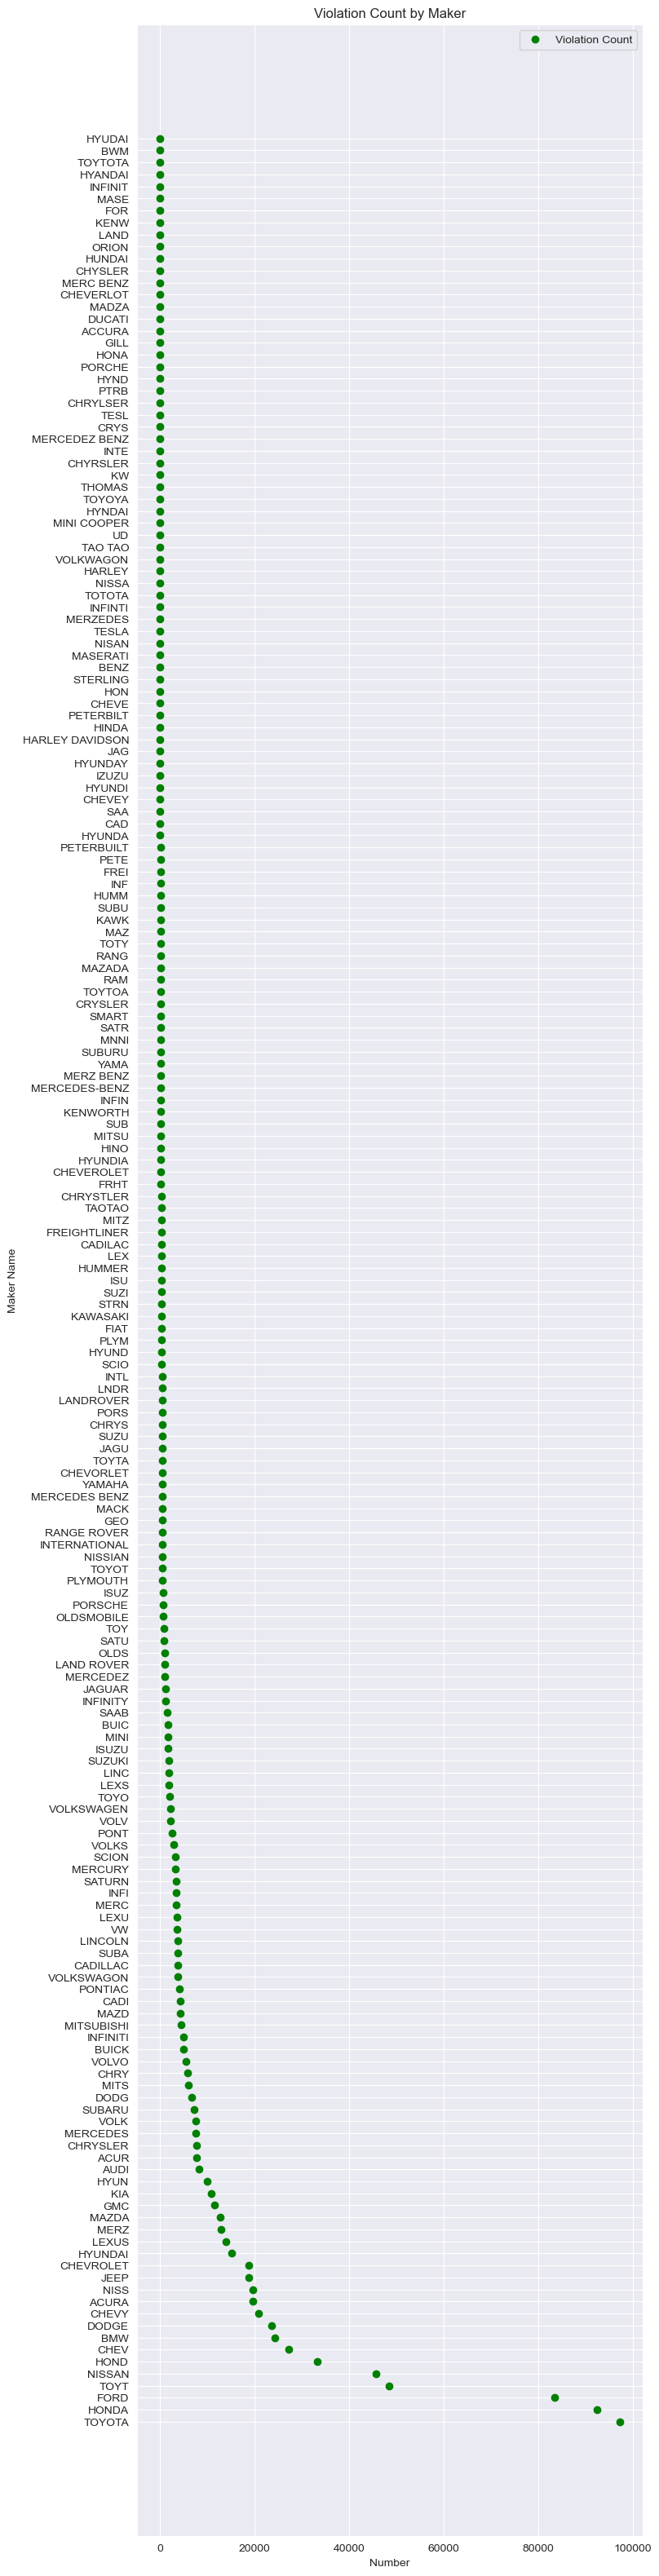

In [641]:
# Visualization the result
fig = plt.figure(figsize=(8,40))
aggResult = aggResult.sort_values(by = 'Count', ascending=True)
x = aggResult['Count']
y = aggResult.index
labels = aggResult['Make']

plt.scatter(x, y, color='g', label = 'Violation Count')
plt.yticks(y, labels)

plt.xlabel('Number')
plt.ylabel('Maker Name')
plt.title('Violation Count by Maker')
plt.legend()
plt.show()

As the data shows, there appear to be some unusual car Makes listed. Initially, I suspected this was due to incidents of mis-spellings of the car Makes. To ensure this was the case, I searched the website https://www.carlogos.org/american-car-brands/ for matches. Once I confirmed that a Make did not exist, These differences would need to be cleaned to improve the data and result accuracy. <BR>
The next stage in my analysis was to export the dataset to a csv and carry out some simple analysis in Microsoft Excel.<BR>

In [642]:
aggResult.to_csv(r'output.txt', header=None, index=None, sep='\t', mode='a')

Using Excel data functions, I was able to remove duplicates within my data set. This left me with a unique list of each car Make. Sorting these in name order allowed me to identify the mis-spellings and abbreviations in the list of Makes.<BR>

I created a list of string pairs, consisting of the correct and incorrect spellings. The following code loads these string pairs into a dataset and uses them to correct the identified spelling mistakes. <BR>

There is a small number of Makes in the dataset that I was unable to clarify. In the case of these, I renamed them to UNKNOWN.

In [643]:
#
# Read pairs from text file into dataframe. Use pairs to clean Make data
#

# Read data file
dfMakeFixes = pd.read_csv('car manufacturer fixes.txt', low_memory=False)

# strip any leading/trailing spaces from Make column and from "Fixes" key pairs
df["Make"]= df["Make"].str.strip()
dfMakeFixes["Wrong"] = dfMakeFixes["Wrong"].str.strip()
dfMakeFixes["Right"] = dfMakeFixes["Right"].str.strip()

# Assign length of Make columne to new column make_length
df['make_length']  = df['Make'].str.len()

# If make_length <= 3, change Make to UNKNOWN
#df.loc[df["make_length"] <= 3, "Make"] = "UNKNOWN"

#Clean data based on starting characters of Make
df.loc[df["Make"].str[:7] == "ACURVAL", "Make"] = "ACURA"
df.loc[df["Make"].str[:5] == "ACUTA", "Make"] = "ACURA"
df.loc[df["Make"].str[:6] == "ACUURA", "Make"] = "ACURA"
df.loc[df["Make"].str[:4] == "ACUR", "Make"] = "ACURA"
df.loc[df["Make"].str[:4] == "AUDI", "Make"] = "AUDI"


# Replace any Make that starts with a digit to UNKNOWN
for x in range(0, 10):
    df.loc[df["Make"].str[:1] == str(x), "Make"] = "UNKNOWN"

# Loop through array of wrong/right pairs. Update Make with correct version as appropriate
for index, data in dfMakeFixes.iterrows():
    df.loc[df["Make"] == data["Wrong"], "Make"] = data["Right"]



In [644]:
# Convert the sub-Agency text field to number in case it is of use later
df.loc[df["SubAgency"] == "Headquarters and Special Operations", "SubAgency"] = "0"
df.loc[df["SubAgency"] == "1st district, Rockville", "SubAgency"] = "1"
df.loc[df["SubAgency"] == "2nd district, Bethesda", "SubAgency"] = "2"
df.loc[df["SubAgency"] == "3rd district, Silver Spring", "SubAgency"] = "3"
df.loc[df["SubAgency"] == "4th district, Wheaton", "SubAgency"] = "4"
df.loc[df["SubAgency"] == "5th district, Germantown", "SubAgency"] = "5"
df.loc[df["SubAgency"] == "6th district, Gaithersburg / Montgomery Village", "SubAgency"] = "6"

df["SubAgency"]


1          2
2          5
3          2
4          6
5          3
          ..
1018534    6
1018535    6
1018536    5
1018537    5
1018538    5
Name: SubAgency, Length: 872069, dtype: object

Having run the data cleaning exercise above, I repeated the original simple grouping exercises. 

In [646]:
# Counting the violations by Maker
df = df.dropna(axis = 0, how='any')
#aggResult = df.groupby(by=['Make'])['Make'].agg(Count=np.size)
aggResult = df.groupby(by=['Make'])['Fatal'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult[aggResult['Count'] >50]
aggResult = aggResult.reset_index()
#aggResult.head(20)
aggResult

,Make,Count
0,TOYOTA,149913
1,HONDA,126168
2,FORD,83738
3,CHEVROLET,68264
4,NISSAN,66237
...,...,...
65,KW,76
66,ORION,72
67,PTRB,70
68,DAEWOO,64


It was immediately clear that the cleaning had an impact on the grouping numbers. For example, the number of TOYOTA cars has increased from 97238 to 149913. Also, the number of distinct Makes has reduced from 191 to 80. 

In [ ]:
# Visualization of the result
fig = plt.figure(figsize=(8,20))
aggResult = aggResult.sort_values(by = 'Count', ascending=True)
x = aggResult['Count']
y = aggResult.index
labels = aggResult['Make']

plt.scatter(x, y, color='g', label = 'Violation Count')
plt.yticks(y, labels)

plt.xlabel('Number')
plt.ylabel('Maker Name')
plt.title('Violation Count by Maker')
plt.legend()
plt.show()

Next, I looked at the year of manufacture of the cars. As with the Make, there were errors in the Year data as well. Below is a list of the count of incidents by ascending Year of manufacture.

In [647]:
# Counting the violations by Year
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Year'])['Year'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['Year'], ascending=False)
aggResult = aggResult[aggResult['Count'] >10]
aggResult = aggResult.reset_index()
aggResult.head(35)
#aggResult

,Year,Count
0,9999.0,22
1,3013.0,15
2,2998.0,14
3,2912.0,17
4,2200.0,11
5,2103.0,13
6,2022.0,19
7,2017.0,606
8,2016.0,9562
9,2015.0,23212


A quick look at the results showed some obvious errors. A lot of the errors appeared to be mis-typing of years. Reviewing the Make and Model of the cars in question on an Internet website, I was able to determine the years of manufacture. Again, I built a set of pairs of right and wrong years and used this to correct the errors.

In [648]:
# Clean years
# Make years int/whole number
#

# Convert column Year from float to int
df["Year"] = df["Year"].astype(int)

# Read data file
dfYearFixes = pd.read_csv('car year fixes.txt', low_memory=False)

# Convert Year to int
#df["Year"] = df["Year"].apply(np.int64)

for index, data in dfYearFixes.iterrows():
    df.loc[df["Year"] == data["Wrong"], "Year"] = data["Right"]


I ran the same check on the corrected data.

In [650]:
# Counting the violations by Year
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Year'])['Year'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['Year'], ascending=False)
aggResult = aggResult[aggResult['Count'] >10]
aggResult = aggResult.reset_index()
aggResult.head(5)
#aggResult

,Year,Count
0,9999,628
1,2200,11
2,2022,19
3,2017,606
4,2016,9562


## Reclassification
The data set is taken from multiple US states. Each state has its own description for violations. To reduce the classes of violation, my next pre-processing exerise was to reclassify the descriptions. Again, I exported the data to Excel to make visual analysis and manipulation easier.

In [651]:
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Description'])['Description'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['Count'], ascending=False)
aggResult = aggResult[aggResult['Count'] >10]
aggResult = aggResult.reset_index()
aggResult

#aggResult.to_csv(r'c:/00/Data Science/Data Sets/violations.txt', header=None, index=None, sep='\t', mode='a')

,Description,Count
0,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,72771
1,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,45016
2,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,34947
3,FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,24339
4,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,20950
...,...,...
1267,DRIVING VEH. ON HWY WITH DEVICE IMPROPERLY DIS...,11
1268,ATTACHING UNAUTHORIZED VEH. REG. PLATE WITH IN...,11
1269,OPERATING A ROLLBACK VEHICLE WHILE TOWING A VE...,11
1270,FAILURE TO GIVE REQUIRED SIGNAL FOR VEH. RIGHT...,11


As before, having identified the values to be changed and their new values, I created a csv file of string pairs. I used this input file to make the reclassification changes I required to standardise the data set.

In [652]:
# Group Violations
# Change Violations to specific groups
#

# Read data file
dfViolationGroups = pd.read_csv('Violation Categories.csv', low_memory=False)

# Insert an empty columm into the data set to store the new Violation Group data
df.insert(0, 'Violation Group', '')

for index, data in dfViolationGroups.iterrows():
    df.loc[df["Description"] == data["Violation"], "Violation Group"] = data["Group"]

The reclassification of the data set has created 19 distinct groups. This process will help improve the predicitibility of the data set.

In [653]:
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Violation Group'])['Violation Group'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['Count'], ascending=False)
aggResult = aggResult[aggResult['Count'] >10]
aggResult = aggResult.reset_index()
aggResult

#aggResult.to_csv(r'c:/00/Data Science/Data Sets/violations.txt', header=None, index=None, sep='\t', mode='a')

,Violation Group,Count
0,Speeding,150685
1,Registration,148698
2,Driving Fault,139565
3,License,132603
4,Stop Fail to,91761
5,Faulty Equipment,81587
6,DWI,28005
7,Seatbelt,23652
8,Mobile Phone,23080
9,,15425


As some of my analysis will involve using the Gender column, I want to replace the abbreviation with the full gender text to make it more visual and readable. There are three Gender values used in the data set, M, M and U. I decided to replace these with Male, Female and Undeclared in that order.

In [654]:
df.loc[df["Gender"] == "M", "Gender"] = "Male"
df.loc[df["Gender"] == "F", "Gender"] = "Female"
df.loc[df["Gender"] == "U", "Gender"] = "Undeclared"


As I wish to graph the data set in terms of more than one column, I want to create a new column that contains the concatenated data from two other columns.<BR>
Initially, I want to review the data in terms of Race and Gender. I need to create a column RaceGender and concatenate the two columns into this one new column

In [655]:
# Create a new Column and concatenate the data form two existing columns
#df=df.drop("RaceGender", axis=1)
df.insert(0, 'RaceGender', df['Race']+'-'+df['Gender'])


### Overall Violation stats
First, I want to prepare a data frame of the total number of violations or each group. This figure will be used later to determine the percentage of violations created by Gender or Race.

In [656]:
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Violation Group'])['Violation Group'].agg(Count=np.size)
aggResult['ViolationsCount'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['Violation Group'], ascending=False)
aggResult = aggResult.reset_index()

dfViolations = aggResult

dfViolations.head(5)


,Violation Group,Count,ViolationsCount
0,Wrong Info,31,31
1,Stop Wrong Place,1580,1580
2,Stop Fail to,91761,91761
3,Speeding,150685,150685
4,Signalling,6065,6065


Wikipedia (https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States) gives us the following breakdown of the US population by race<BR><BR>
<TABLE>
    <TR>
        <TD>White</TD>
        <TD>59.3%</TD>
    </TR>
    <TR>
        <TD>Hispanic/Lation</TD>
        <TD>18.9%</TD>
    </TR>
    <TR>
        <TD>Black</TD>
        <TD>12.6%</TD>
    </TR>
    <TR>
        <TD>Asian</TD>
        <TD>5.9%</TD>
    </TR>
    <TR>
        <TD>Native American</TD>
        <TD>0.7%</TD>
    </TR>
    <TR>
        <TD>Other</TD>
        <TD>2.6%</TD>
    </TR>
</TABLE>
I will now look at the data in terms of percentage of violations by Race<BR>


In [657]:
raceStats = [["WHITE",59.3],["BLACK",12.6],["HISPANIC",18.9],["ASIAN",5.9],["NATIVE AMERICAN",.7],["OTHER",2.6]]
dfRaceStats = pd.DataFrame(raceStats, columns=['Race', 'Percentage'])

print(dfRaceStats)

              Race  Percentage
0            WHITE        59.3
1            BLACK        12.6
2         HISPANIC        18.9
3            ASIAN         5.9
4  NATIVE AMERICAN         0.7
5            OTHER         2.6


Next, I will create a data frame that contains the count of violations grouped by Race.

In [664]:
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Violation Group','Race'])['Violation Group'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['Count'], ascending=False)
#aggResult = aggResult[aggResult['Count'] >50]
aggResult = aggResult.reset_index()

dfViolationsByRace = aggResult
dfViolationsByRace.head(10)


,Violation Group,Race,Count
0,Speeding,WHITE,74035
1,Registration,WHITE,55709
2,Driving Fault,WHITE,54976
3,License,BLACK,53785
4,Registration,BLACK,52622
5,Driving Fault,BLACK,39293
6,Speeding,BLACK,35971
7,License,HISPANIC,35751
8,Stop Fail to,WHITE,34656
9,License,WHITE,34166


Next, I will create a data frame that coutains the count of violations grouped by Gender.

In [662]:
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Violation Group','Gender'])['Violation Group'].agg(Count=np.size)
aggResult['GenderCount'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['GenderCount'], ascending=False)
#aggResult = aggResult[aggResult['Count'] >50]
aggResult = aggResult.reset_index()
dfViolationsByGender = aggResult


In [663]:
dfViolationsByGender.head(10)

,Violation Group,Gender,Count,GenderCount
0,License,Male,96109,96109
1,Registration,Male,95660,95660
2,Speeding,Male,93903,93903
3,Driving Fault,Male,90285,90285
4,Stop Fail to,Male,58441,58441
5,Speeding,Female,56769,56769
6,Faulty Equipment,Male,55916,55916
7,Registration,Female,52882,52882
8,Driving Fault,Female,49227,49227
9,License,Female,36481,36481


In [665]:
# Create temporary dataframe
dfTemp = pd.merge(dfViolations, dfViolationsByRace, on="Violation Group")
#dfViolationsByRace = dfViolationsByRace.drop("Percentage",axis=1);
dfViolationsByRace.insert(0, 'Percentage', (dfTemp['Count_y']/dfTemp['Count_x'])*100)
dfTemp = pd.merge(dfTemp, dfViolationsByGender, on="Violation Group")
dfTemp.head(3)

# Delete temporary dataframe
del dfTemp



In [666]:
dfViolationsByRace.head(10)

,Percentage,Violation Group,Race,Count
0,41.935484,Speeding,WHITE,74035
1,25.806452,Registration,WHITE,55709
2,25.806452,Driving Fault,WHITE,54976
3,6.451613,License,BLACK,53785
4,36.329114,Registration,BLACK,52622
5,26.012658,Driving Fault,BLACK,39293
6,21.708861,Speeding,BLACK,35971
7,10.126582,License,HISPANIC,35751
8,5.569620,Stop Fail to,WHITE,34656
9,0.253165,License,WHITE,34166


In [667]:
# Create temporary dataframe
dfTemp2 = pd.merge(dfViolations, dfViolationsByGender, on="Violation Group")
dfTemp2.head(20)
#dfViolationsByGender = dfViolationsByGender.drop("Percentage",axis=1);
dfViolationsByGender.insert(0, 'Percentage', (dfTemp2['Count_y']/dfTemp2['Count_x'])*100)
dfViolationsByGender.head(20)

# Delete temporary dataframe
del dfTemp2

<Axes: xlabel='Violation Group', ylabel='Percentage'>

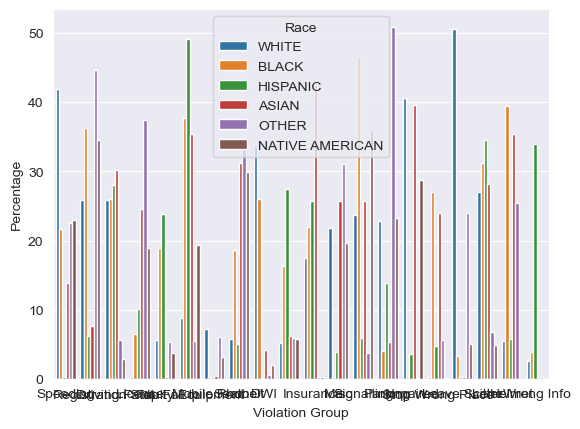

In [668]:
#sns.barplot(dfViolationsByRace, x="Race_Percent",y="Violation Group",  hue="Race", orient='y')
sns.barplot(dfViolationsByRace, x="Violation Group",y="Percentage",  hue="Race", orient='x')


0    59.3
Name: Percentage, dtype: float64


<Axes: xlabel='Race'>

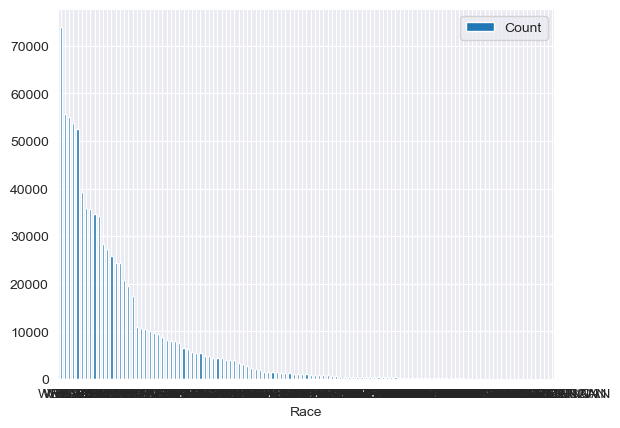

In [669]:
# some example data

#white = 
dfTemp = dfRaceStats[dfRaceStats['Race'] == "WHITE"]
white=dfTemp['Percentage']
print(white)
#df[df["ossId"] == 2550]

x = dfViolationsByRace

# split it up
#above_threshold = np.maximum(x - threshold, 0)
#below_threshold = np.minimum(values, threshold)

# and plot it
#fig, ax = plt.subplots()
#ax.bar(0, x, 0.35, color="g")
#ax.bar(x, above_threshold, 0.35, color="r",
 #       bottom=below_threshold)

# horizontal line indicating the threshold
#ax.plot([0., 4.5], [white, white], "k--")
#ax.plot([0., 4.5], [black, black], "k--")

dfViolationsByRace.plot.bar(x="Race", y="Count",rot=0)



In [670]:
aggResult = dfViolationsByRace[dfViolationsByRace['Count'] >40000]
dfTemp3 = aggResult


<Axes: xlabel='Violation Group'>

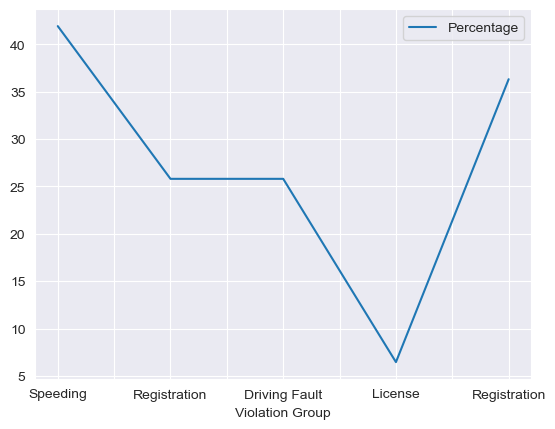

In [671]:
dfTemp3.plot(x="Violation Group", y="Percentage",rot=0)


<Axes: xlabel='Count', ylabel='Violation Group'>

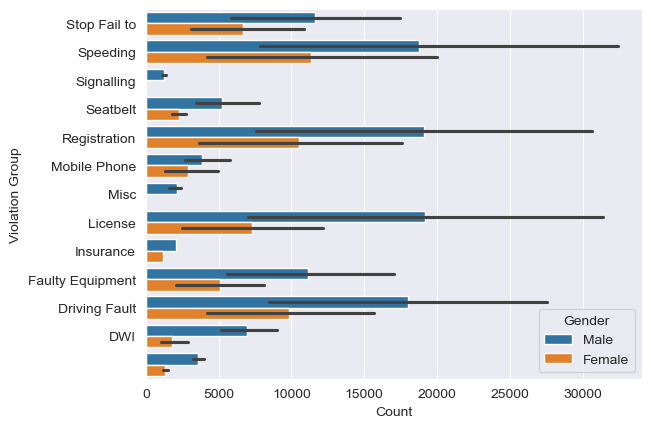

In [672]:
sns.barplot(dfViolationsGender, x="Count",y="Violation Group",  hue="Gender", orient='y')

<Axes: xlabel='Count', ylabel='Violation Group'>

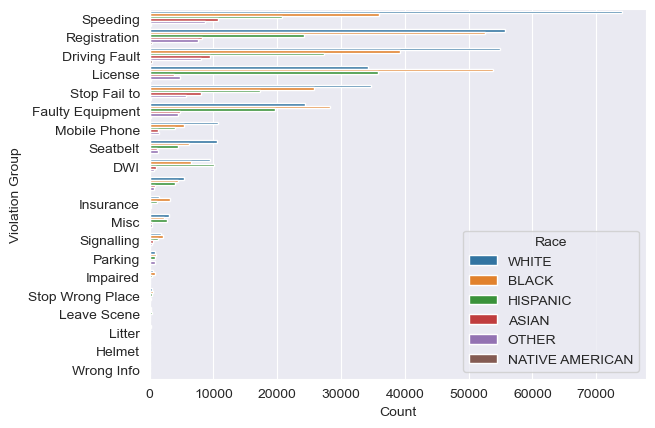

In [673]:
sns.barplot(dfViolationsRace, x="Count",y="Violation Group",  hue="Race", orient='y')

In [675]:
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Violation Group','Race'])['Violation Group'].agg(Count=np.size)
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(['Count'], ascending=False)
aggResult = aggResult[aggResult['Count'] >1000]
aggResult = aggResult.reset_index()

dfViolationsRace = aggResult

aggResult.head(10)


,Violation Group,Race,Count
0,Speeding,WHITE,74035
1,Registration,WHITE,55709
2,Driving Fault,WHITE,54976
3,License,BLACK,53785
4,Registration,BLACK,52622
5,Driving Fault,BLACK,39293
6,Speeding,BLACK,35971
7,License,HISPANIC,35751
8,Stop Fail to,WHITE,34656
9,License,WHITE,34166


In [ ]:
#  LOOK AT RACE AS % OF POPULATION AND GRAPH THAT WAY TOO

<Axes: xlabel='Count', ylabel='Violation Group'>

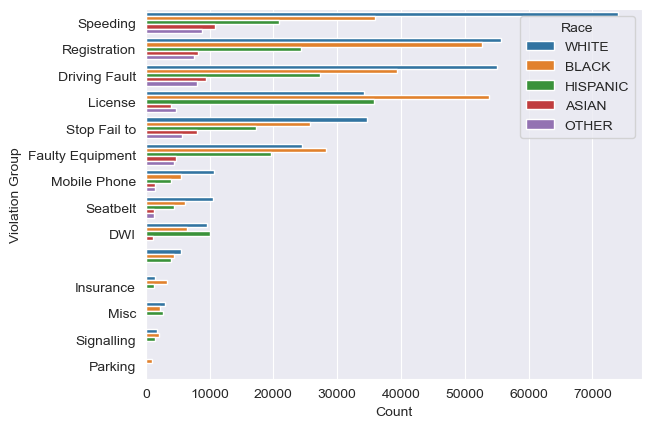

In [676]:
sns.barplot(dfViolationsRace, x="Count",y="Violation Group",  hue="Race", orient='y')

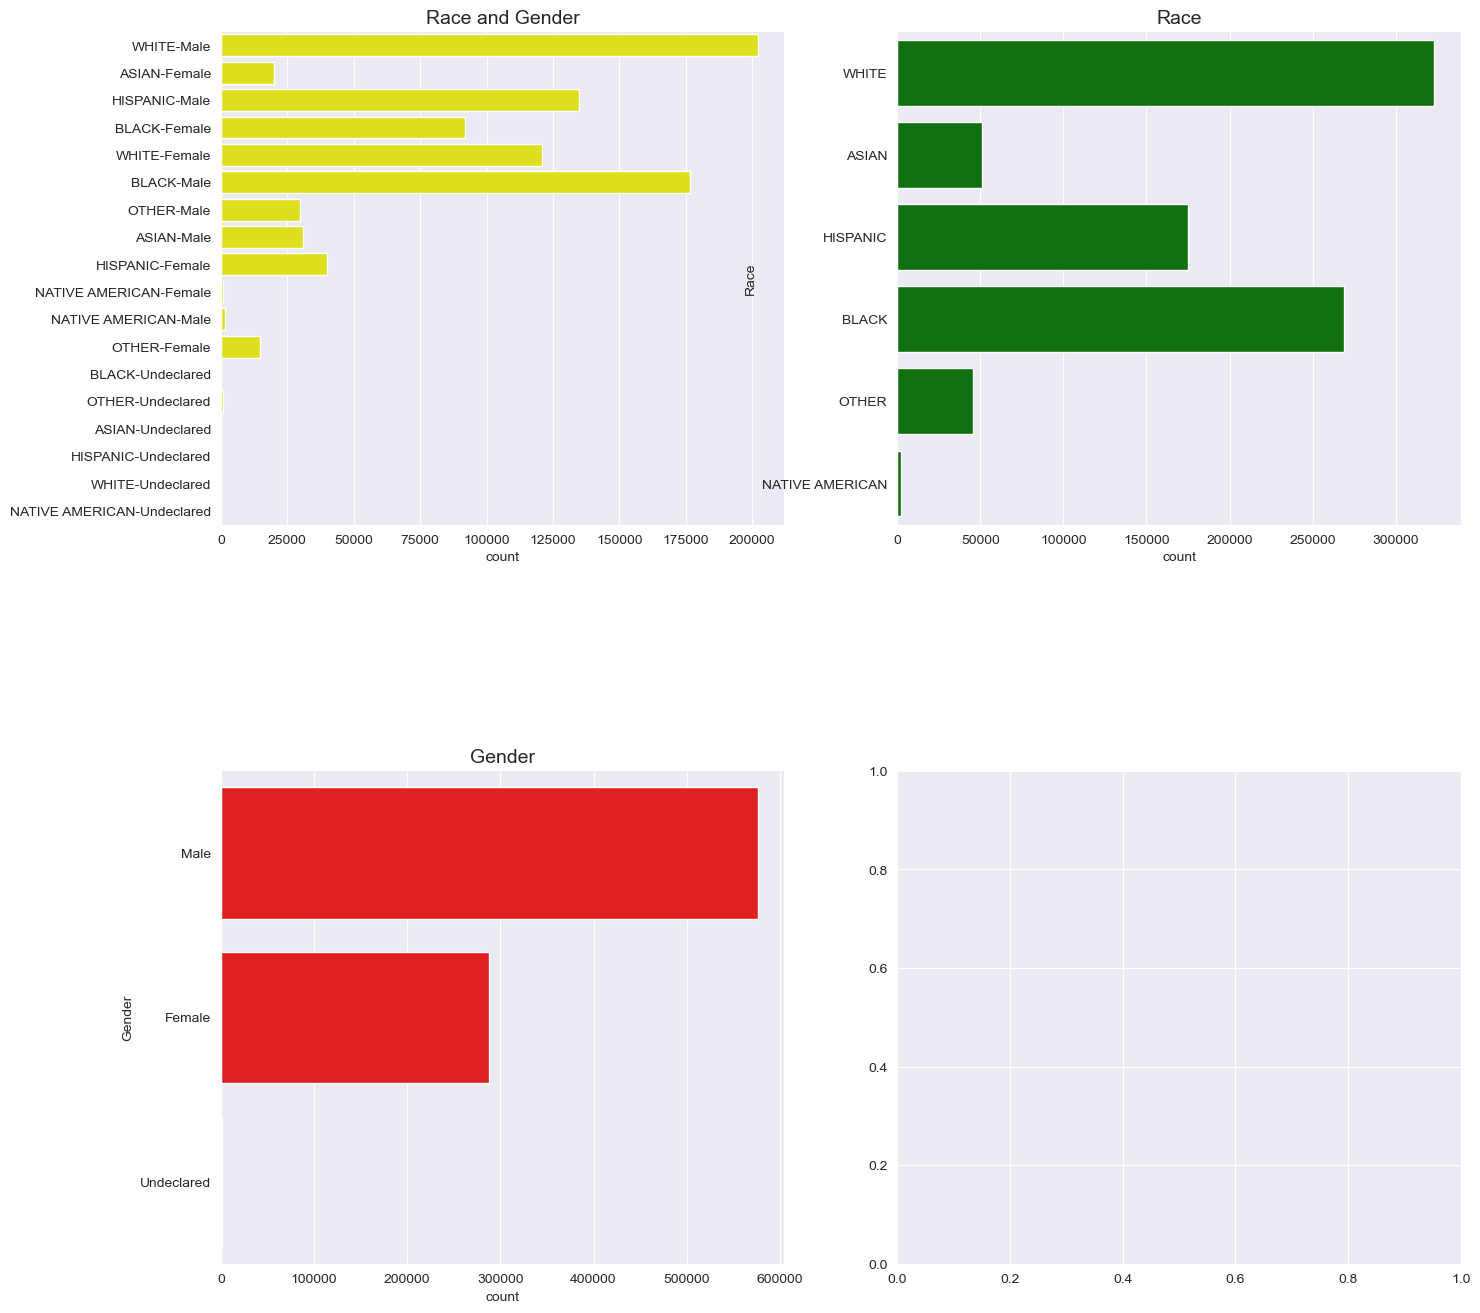

In [677]:
# Let's see the kinds of violations
f, axarr = plt.subplots(2, 2, figsize=(16, 16))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Race'] + '-' + df['Gender'], ax=axarr[0][0], color='yellow')
axarr[0][0].set_title("Race and Gender", fontsize=14)

sns.countplot(df['Race'], ax=axarr[0][1], color='green')
axarr[0][1].set_title("Race", fontsize=14)

sns.countplot(df['Gender'], ax=axarr[1][0], color='red')
axarr[1][0].set_title("Gender", fontsize=14)

sns.despine()

## TO DO

Look at race as % of population and graph that way


## Decision Tree Research

The first Machine Learning tool I will look at are Decision Trees. I have reviewed one of the Jupyter Notebooks produced by Jake Vanderplas (https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb). In this notebook, he Vanderplas looks at Decision Trees and Random Forests.<BR><BR>
Here, I will take some of his work and make some changes to identify the impacts of the changes as a means of understanding how the processes work.<BR><BR>
As with above, I will show the before and after situations. 

## What is a decision tree
As the name suggests, a decision tree is a model that assists in the process of making decisions. The tree allows the user to display decision points and their probable outcomes. Each branch of the tree represents a binary decision and can easily be evaluated and compared in order to select the best courses of action to take based on a data set.<BR><BR>
The following is a simple example of a decision tree model. This model helps decide if an animal in a picture is a dog or an elephant.<BR>

In [ ]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Dog or Dumbo?', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "Has the animal a tail?", 20)
text(ax, 0.3, 0.6, "Has the animal\na trunk?", 18)
text(ax, 0.7, 0.6, "Manx Cat???", 18)
text(ax, 0.12, 0.3, "Elephant", 14)
text(ax, 0.38, 0.3, "Dog", 14)

text(ax, 0.4, 0.75, "Yes", 12, alpha=0.6)
text(ax, 0.6, 0.75, "No", 12, alpha=0.6)

text(ax, 0.21, 0.45, "Yes", 12, alpha=0.6)
text(ax, 0.34, 0.45, "No", 12, alpha=0.6)

#text(ax, 0.66, 0.45, "Yes", 12, alpha=0.6)
#text(ax, 0.79, 0.45, "No", 12, alpha=0.6)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
#ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
#ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
#ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
#ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
#ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
#ax.axis([0, 1, 0, 1])

fig.savefig('05.08-decision-tree.png')

## Please Note:

To run these examples below, you will need to install the scikit-learn module. TThe next block of code will check to see if scikit-learn is installed already. Follow the instructions below to proceed.<BR><BR>

The scikit-learn module is a powerful tool for machine learning. 

In [ ]:
# Run this code to check if scikit-learn module is installed. If not, run the next block to code to do so.
!pip show scikit-learn

#If the scikit-learn module is not installed, please proceed to the next block of code. If it is installed, skip the next block.

In [ ]:
#Install scikit-learn module
!pip install -U scikit-learn

### Create a data set

The first step in the process of generating a decision tree is to generate a data set. The following code will produce a 2-dimensional data set with 4 different classes. The code will assign each class a separate color<BR>

In [ ]:
# Import the sklearn module from scikit-learn
import sklearn

from sklearn.datasets import make_blobs

# Generate the data blob. 
#
# centers determines the number of classes
# n_samples determines the number of samples to generate
# random_state determines whether the randomisation is the same each time or not (supporting repeatable datasets) 
# random_state=0 means the randomisation is the same each time
# x is the data value
# y is the classification (used to determine color of the blob in the chart)

X, y = make_blobs(n_samples=200, centers=3,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

The output chart shows the data set and its classes. The next step in our process is to 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

To facilitate the operation of some of the samples, please run the code below. This will generate a python script file that will be used in the exercises to draw representations of decision trees as appropriate.<BR>


### Building a tree - A step by step view

The following block of code will step through the data set and make the "best fit" split for each class of data. The visualisation of each step will be shown below.<BR><BR>

In [ ]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 6, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

#X, y = make_blobs(n_samples=300, centers=4,
#                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 7)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

#fig.savefig('05.08-decision-tree-levels.png')

### Random Forests
As each iteration runs, the classifications become more complicated and contain very small amounts of data. This is known as overfitting and is a significant issue with decision trees in general.<BR><BR>
One way to avoid overfitting is to generate multiple trees based on subsets of the data being analysed. <BR><BR>
The next section of code takes four separate slices of the data set X created above and creates a separate tree from each set.


In [ ]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 5, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])
visualize_tree(model, X[::1], y[::1], boundaries=False, ax=ax[2])
visualize_tree(model, X[1::], y[1::], boundaries=False, ax=ax[3])
visualize_tree(model, X[2::], y[2::], boundaries=False, ax=ax[4])

#fig.savefig('images/05.08-decision-tree-overfitting.png')

The first figure provides the most accurate classification of the three. The data is broken into three distinct classes and only one data point is not classified. In the second diagam, there are 4 classes and the third diagram shows 5 classes. 

An effective way of managing overfitting is to create multiple trees, each based on a different set of data slices from the original data set. By creating a number of models that each overfit the data, it is possible to identify a single model that gives teh best-fit classification of the data set being examined.<BR><BR>
This technique of creating subsets of data is called bagging. The following code generates a series of 100 estimatorsm each made up of 80% of the overall data set. 

In [ ]:
## from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=0)

bag.fit(X, y)
visualize_classifier(bag, X, y)